<a href="https://colab.research.google.com/github/chonyeagoro/Machine_Learning_Project_4_Final/blob/main/Apple_vs_Tesla_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf

In [3]:
df = pd.read_csv('/content/Stock_Market_Dataset.csv')
df

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2/2/2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,1/2/2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1238,8/2/2019,2.583,147880.0,52.72,621000.0,2.8140,270.0,"3,661.70",699230.0,...,"3,00,771",240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,"1,318.50",150610.0
1239,1239,7/2/2019,2.551,211790.0,52.64,749010.0,2.8320,320.0,"3,397.70",471360.0,...,"3,02,813",240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,"1,314.20",166760.0
1240,1240,6/2/2019,2.662,98330.0,54.01,606720.0,2.8400,100.0,"3,404.30",514210.0,...,"3,08,810",120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,"1,314.40",137250.0
1241,1241,5/2/2019,2.662,82250.0,53.66,609760.0,2.8205,90.0,"3,468.40",460950.0,...,"3,10,700",360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0,"1,319.20",129010.0


In [5]:
df.rename(columns={'Unnamed: 0': 'Index', 'Apple_Vol.': 'Apple_Volume', 'Tesla_Vol.':'Tesla_Volume'}, inplace = True)
df


,Index,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,2/2/2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,1/2/2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,1238,8/2/2019,2.583,147880.0,52.72,621000.0,2.8140,270.0,"3,661.70",699230.0,...,"3,00,771",240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0,"1,318.50",150610.0
1239,1239,7/2/2019,2.551,211790.0,52.64,749010.0,2.8320,320.0,"3,397.70",471360.0,...,"3,02,813",240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0,"1,314.20",166760.0
1240,1240,6/2/2019,2.662,98330.0,54.01,606720.0,2.8400,100.0,"3,404.30",514210.0,...,"3,08,810",120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0,"1,314.40",137250.0
1241,1241,5/2/2019,2.662,82250.0,53.66,609760.0,2.8205,90.0,"3,468.40",460950.0,...,"3,10,700",360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0,"1,319.20",129010.0


In [6]:
df.columns

Index(['Index', 'Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.',
       'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.',
       'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.',
       'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Nasdaq_100_Vol.', 'Apple_Price', 'Apple_Volume', 'Tesla_Price',
       'Tesla_Volume', 'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price',
       'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price',
       'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price',
       'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price',
       'Meta_Vol.', 'Gold_Price', 'Gold_Vol.'],
      dtype='object')

In [7]:
df.drop(['Natural_Gas_Price', 'Natural_Gas_Vol.',
       'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.',
       'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.',
       'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Nasdaq_100_Vol.','Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price',
       'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price',
       'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price',
       'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price',
       'Meta_Vol.', 'Gold_Price', 'Gold_Vol.'], axis=1, inplace=True)
df

,Index,Date,Apple_Price,Apple_Volume,Tesla_Price,Tesla_Volume
0,0,2/2/2024,185.85,102550000.0,187.91,110610000.0
1,1,1/2/2024,186.86,53490000.0,188.86,90680000.0
2,2,31-01-2024,184.40,54830000.0,187.29,102270000.0
3,3,30-01-2024,188.04,55270000.0,191.59,105540000.0
4,4,29-01-2024,191.73,46890000.0,190.93,123600000.0
...,...,...,...,...,...,...
1238,1238,8/2/2019,42.60,95280000.0,20.39,87660000.0
1239,1239,7/2/2019,42.73,126970000.0,20.50,97810000.0
1240,1240,6/2/2019,43.56,112960000.0,21.15,75580000.0
1241,1241,5/2/2019,43.55,144410000.0,21.42,101140000.0


In [8]:
df['Date'] = df['Date'].str.replace('/', '-')
df

,Index,Date,Apple_Price,Apple_Volume,Tesla_Price,Tesla_Volume
0,0,2-2-2024,185.85,102550000.0,187.91,110610000.0
1,1,1-2-2024,186.86,53490000.0,188.86,90680000.0
2,2,31-01-2024,184.40,54830000.0,187.29,102270000.0
3,3,30-01-2024,188.04,55270000.0,191.59,105540000.0
4,4,29-01-2024,191.73,46890000.0,190.93,123600000.0
...,...,...,...,...,...,...
1238,1238,8-2-2019,42.60,95280000.0,20.39,87660000.0
1239,1239,7-2-2019,42.73,126970000.0,20.50,97810000.0
1240,1240,6-2-2019,43.56,112960000.0,21.15,75580000.0
1241,1241,5-2-2019,43.55,144410000.0,21.42,101140000.0


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df

,Index,Date,Apple_Price,Apple_Volume,Tesla_Price,Tesla_Volume
0,0,2024-02-02,185.85,102550000.0,187.91,110610000.0
1,1,2024-02-01,186.86,53490000.0,188.86,90680000.0
2,2,2024-01-31,184.40,54830000.0,187.29,102270000.0
3,3,2024-01-30,188.04,55270000.0,191.59,105540000.0
4,4,2024-01-29,191.73,46890000.0,190.93,123600000.0
...,...,...,...,...,...,...
1238,1238,2019-02-08,42.60,95280000.0,20.39,87660000.0
1239,1239,2019-02-07,42.73,126970000.0,20.50,97810000.0
1240,1240,2019-02-06,43.56,112960000.0,21.15,75580000.0
1241,1241,2019-02-05,43.55,144410000.0,21.42,101140000.0


In [10]:
# Check Data to make sure that the data set does not have any Null values
null_values = df.isnull().sum()
# Print the Values
print("Null values count for each column:")
print(null_values)

Null values count for each column:
Index           0
Date            0
Apple_Price     0
Apple_Volume    0
Tesla_Price     0
Tesla_Volume    0
dtype: int64


In [11]:
df.dropna(inplace=True)
null_values = df.isnull().sum()
print("Number of null values: ")
print(null_values)

Number of null values: 
Index           0
Date            0
Apple_Price     0
Apple_Volume    0
Tesla_Price     0
Tesla_Volume    0
dtype: int64


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df_grouped = df.groupby('Year').mean().reset_index()
df_grouped

,Year,Index,Date,Apple_Price,Apple_Volume,Tesla_Price,Tesla_Volume
0,2019,1127.5,2019-07-18 06:34:26.086956544,53.344348,1.082951e+08,17.950391,1.391627e+08
1,2020,888.0,2020-07-01 19:16:37.590361344,95.263815,1.580562e+08,96.405984,2.261656e+08
2,2021,640.5,2021-07-04 04:29:16.097561088,141.010081,9.069122e+07,259.890935,8.275760e+07
3,2022,395.0,2022-07-03 18:07:20.816326656,154.892571,8.795837e+07,262.945918,8.698180e+07
4,2023,147.5,2023-07-02 09:18:43.200000000,172.548920,5.846768e+07,217.475240,1.370767e+08
5,2024,11.0,2024-01-17 18:46:57.391304448,187.605217,5.798696e+07,213.717826,1.097287e+08


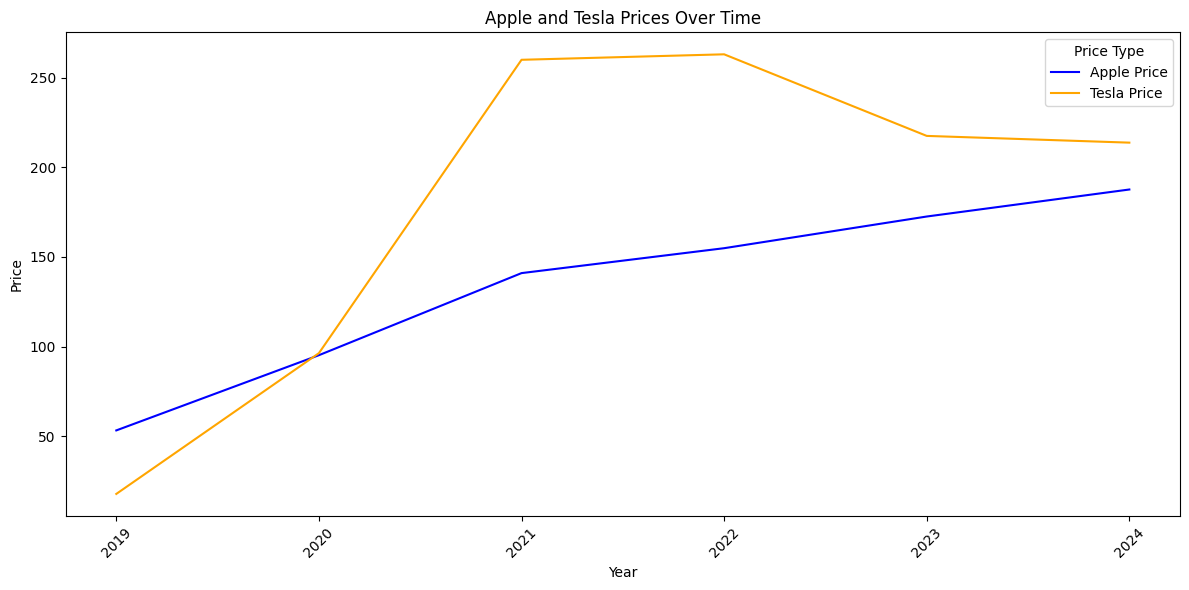

In [13]:

plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Year'], df_grouped['Apple_Price'], label='Apple Price', color='blue')
plt.plot(df_grouped['Year'], df_grouped['Tesla_Price'], label='Tesla Price', color='orange')
plt.title('Apple and Tesla Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Price Type')
plt.tight_layout()
plt.show()

In [14]:
# Step 4: Calculate the correlation coefficient
apple_corr = df['Apple_Volume'].corr(df['Apple_Price'])
tesla_corr = df['Tesla_Volume'].corr(df['Tesla_Price'])
print("Correlation between Apple Volume and Apple Price:", apple_corr)
print("Correlation between Tesla Volume and Tesla Price:", tesla_corr)

Correlation between Apple Volume and Apple Price: -0.46876330831957586
Correlation between Tesla Volume and Tesla Price: -0.447560875507868


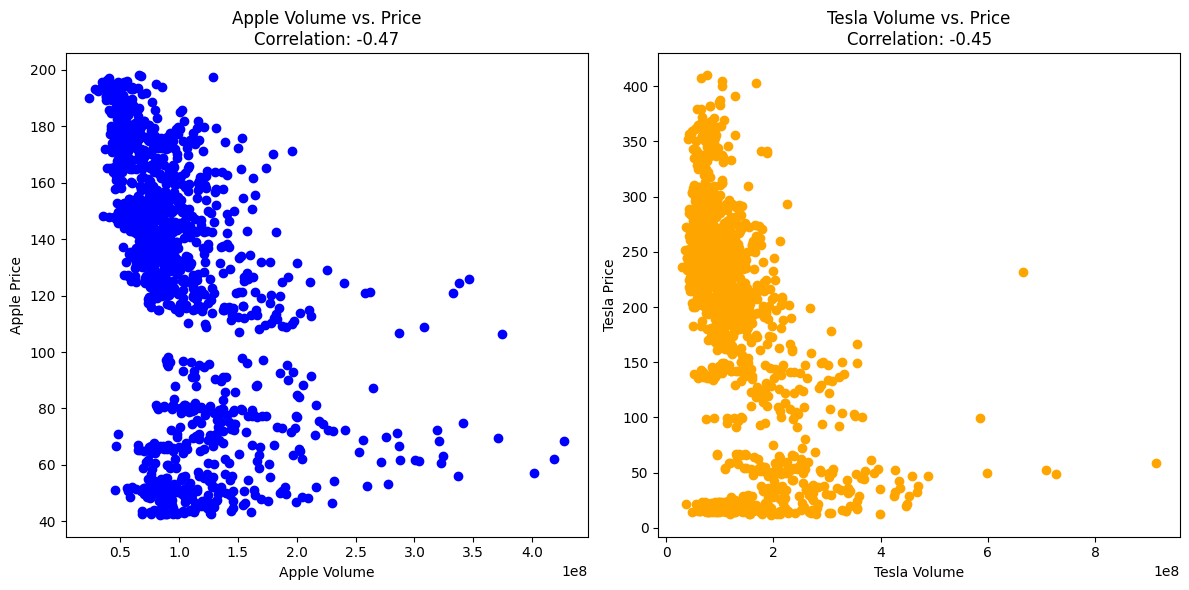

In [15]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['Apple_Volume'], df['Apple_Price'], color='blue')
plt.title(f'Apple Volume vs. Price\nCorrelation: {apple_corr:.2f}')
plt.xlabel('Apple Volume')
plt.ylabel('Apple Price')

plt.subplot(1, 2, 2)
plt.scatter(df['Tesla_Volume'], df['Tesla_Price'], color='orange')
plt.title(f'Tesla Volume vs. Price\nCorrelation: {tesla_corr:.2f}')
plt.xlabel('Tesla Volume')
plt.ylabel('Tesla Price')

plt.tight_layout()
plt.show()

8/8 [==============================] - 0s 2ms/step
Apple Price Predictions:
Linear Regression MSE: 1.5540620489173225
Random Forest MSE: 2.154234805461856
LSTM MSE: 68.5836602426263

Tesla Price Predictions:
Linear Regression MSE: 14.282679304533414
Random Forest MSE: 21.361771575461795
LSTM MSE: 169.2469436883312


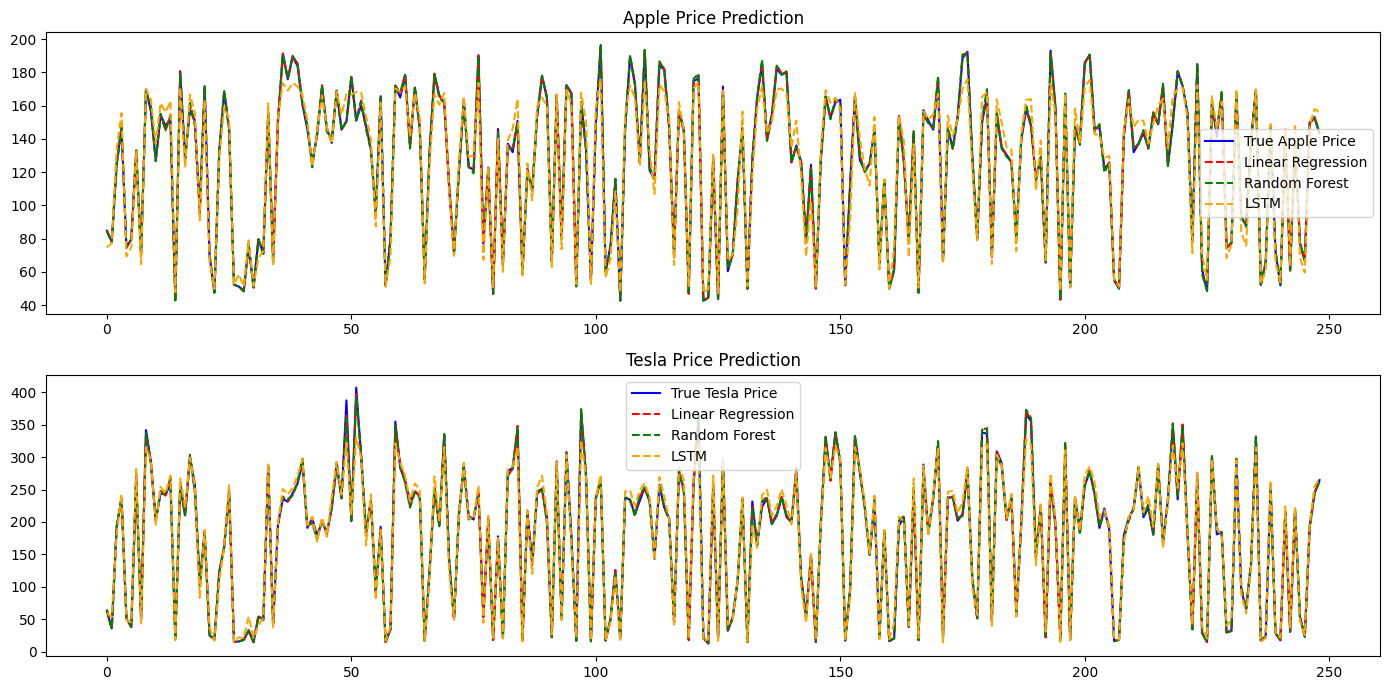

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Add technical indicators (e.g., moving averages)
df['Apple_MA'] = df['Apple_Price'].rolling(window=2).mean()
df['Tesla_MA'] = df['Tesla_Price'].rolling(window=2).mean()

# Drop NaN values created by moving average
df.dropna(inplace=True)

# Features and target
features = ['Apple_Volume', 'Apple_MA', 'Tesla_Volume', 'Tesla_MA']
target_apple = 'Apple_Price'
target_tesla = 'Tesla_Price'

# Split the data
X = df[features]
y_apple = df[target_apple]
y_tesla = df[target_tesla]

X_train, X_test, y_apple_train, y_apple_test, y_tesla_train, y_tesla_test = train_test_split(X, y_apple, y_tesla, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_apple_train)
y_apple_pred_lr = lr_model.predict(X_test_scaled)
lr_model.fit(X_train_scaled, y_tesla_train)
y_tesla_pred_lr = lr_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_apple_train)
y_apple_pred_rf = rf_model.predict(X_test_scaled)
rf_model.fit(X_train_scaled, y_tesla_train)
y_tesla_pred_rf = rf_model.predict(X_test_scaled)

#LSTM
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_apple_train, batch_size=1, epochs=1)
y_apple_pred_lstm = lstm_model.predict(X_test_lstm)

lstm_model.fit(X_train_lstm, y_tesla_train, batch_size=1, epochs=1)
y_tesla_pred_lstm = lstm_model.predict(X_test_lstm)

# Evaluate models
print("Apple Price Predictions:")
print(f"Linear Regression MSE: {mean_squared_error(y_apple_test, y_apple_pred_lr)}")
print(f"Random Forest MSE: {mean_squared_error(y_apple_test, y_apple_pred_rf)}")
print(f"LSTM MSE: {mean_squared_error(y_apple_test, y_apple_pred_lstm)}")

print("\nTesla Price Predictions:")
print(f"Linear Regression MSE: {mean_squared_error(y_tesla_test, y_tesla_pred_lr)}")
print(f"Random Forest MSE: {mean_squared_error(y_tesla_test, y_tesla_pred_rf)}")
print(f"LSTM MSE: {mean_squared_error(y_tesla_test, y_tesla_pred_lstm)}")

# Visualization
plt.figure(figsize=(14, 7))

# Apple Predictions
plt.subplot(2, 1, 1)
plt.plot(y_apple_test.values, label='True Apple Price', color='blue')
plt.plot(y_apple_pred_lr, label='Linear Regression', linestyle='dashed', color='red')
plt.plot(y_apple_pred_rf, label='Random Forest', linestyle='dashed', color='green')
plt.plot(y_apple_pred_lstm, label='LSTM', linestyle='dashed', color='orange')
plt.title('Apple Price Prediction')
plt.legend()

# Tesla Predictions
plt.subplot(2, 1, 2)
plt.plot(y_tesla_test.values, label='True Tesla Price', color='blue')
plt.plot(y_tesla_pred_lr, label='Linear Regression', linestyle='dashed', color='red')
plt.plot(y_tesla_pred_rf, label='Random Forest', linestyle='dashed', color='green')
plt.plot(y_tesla_pred_lstm, label='LSTM', linestyle='dashed', color='orange')
plt.title('Tesla Price Prediction')
plt.legend()

plt.tight_layout()
plt.show()

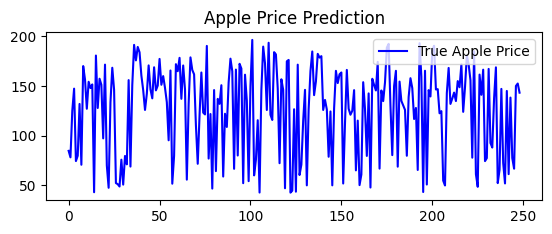

In [17]:
plt.subplot(2, 1, 1)
plt.plot(y_apple_test.values, label='True Apple Price', color='blue')
plt.title('Apple Price Prediction')
plt.legend(loc = 'upper right')

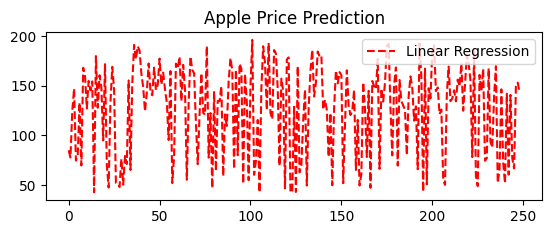

In [18]:
plt.subplot(2, 1, 1)
plt.plot(y_apple_pred_lr, label='Linear Regression', linestyle='dashed', color='red')
plt.title('Apple Price Prediction')
plt.legend(loc = 'upper right')

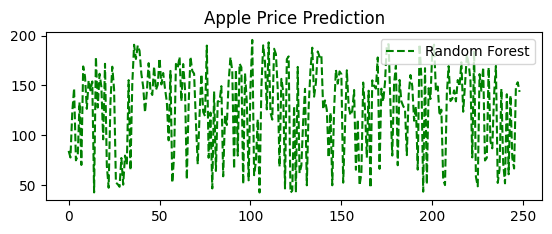

In [19]:
plt.subplot(2, 1, 1)
plt.plot(y_apple_pred_rf, label='Random Forest', linestyle='dashed', color='green')
plt.title('Apple Price Prediction')
plt.legend(loc = 'upper right')

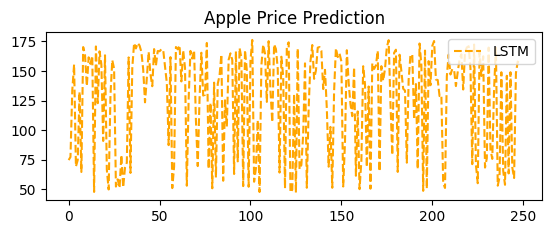

In [20]:
plt.subplot(2, 1, 1)
plt.plot(y_apple_pred_lstm, label='LSTM', linestyle='dashed', color='orange')
plt.title('Apple Price Prediction')
plt.legend(loc = 'upper right')

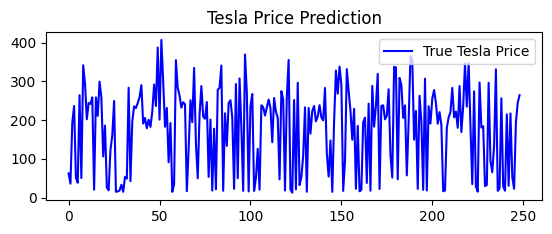

In [21]:
plt.subplot(2, 1, 2)
plt.plot(y_tesla_test.values, label='True Tesla Price', color='blue')
plt.title('Tesla Price Prediction')
plt.legend(loc = 'upper right')


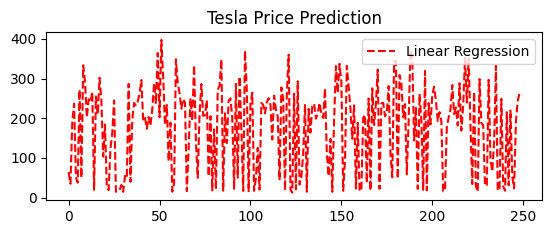

In [22]:
plt.subplot(2, 1, 2)
plt.plot(y_tesla_pred_lr, label='Linear Regression', linestyle='dashed', color='red')
plt.title('Tesla Price Prediction')
plt.legend(loc = 'upper right')

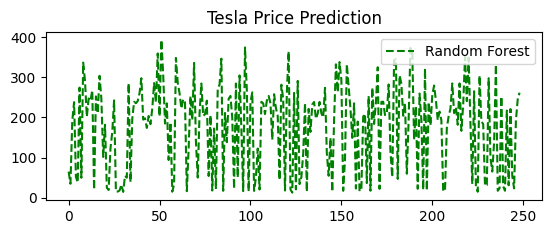

In [23]:
plt.subplot(2, 1, 1)
plt.plot(y_tesla_pred_rf, label='Random Forest', linestyle='dashed', color='green')
plt.title('Tesla Price Prediction')
plt.legend(loc = 'upper right')



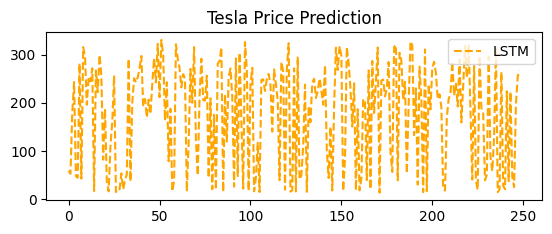

In [24]:
plt.subplot(2, 1, 1)
plt.plot(y_tesla_pred_lstm, label='LSTM', linestyle='dashed', color='orange')
plt.title('Tesla Price Prediction')
plt.legend(loc = 'upper right')

In [25]:
# Assuming df is your DataFrame and is already loaded
# Select features
features = ['Apple_Volume', 'Apple_Price', 'Tesla_Volume', 'Tesla_Price']
selected_features = df[features]
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)
# Calculate the inertia for different values of k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
# Define the trace for the elbow plot
elbow_trace = go.Scatter(x=list(k_range), y=inertia, mode='lines+markers', name='Inertia', marker=dict(color='blue'))
# Create the layout for the plot
layout = go.Layout(
    title='Elbow Method For Optimal k',
    xaxis=dict(title='Number of clusters'),
    yaxis=dict(title='Inertia'),
    width=800,
    height=600
)
# Combine the trace and layout into a figure
fig = go.Figure(data=[elbow_trace], layout=layout)
# Show the interactive plot
fig.show()
# Assume the optimal number of clusters (K) is determined to be 3
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
# Add cluster labels to the original data
df['Cluster'] = clusters
# Visualize the clusters using Plotly
def plot_clusters(data, x_feature, y_feature, title):
    fig = px.scatter(data, x=x_feature, y=y_feature, color='Cluster', hover_data=data.columns, title=title)
    fig.show()
# Visualize clusters for Apple and Tesla
plot_clusters(df, 'Apple_Price', 'Apple_Volume', 'Apple Clusters based on Price Vs Volume')
plot_clusters(df, 'Tesla_Price', 'Tesla_Volume', 'Tesla Clusters based on Price Vs Volume')

